In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%pip install wget

In [4]:
!python -m wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/laptops.csv


Saved under laptops (3).csv


In [5]:
%ls

 Volume in drive D is New Volume
 Volume Serial Number is 2BA9-5340

 Directory of d:\Machine Leaning\ml_homework\02-linear-regression

12/10/2024  21:28    <DIR>          .
10/10/2024  18:46    <DIR>          ..
10/10/2024  17:46                 6 .gitignore
10/10/2024  19:32    <DIR>          .ipynb_checkpoints
12/10/2024  21:28            97,512 homework.ipynb
10/10/2024  22:50           298,573 laptops (1).csv
10/10/2024  23:07           298,573 laptops (2).csv
12/10/2024  21:28           298,573 laptops (3).csv
10/10/2024  19:03           298,573 laptops.csv
10/10/2024  17:46             3,925 readme.md
               7 File(s)      1,295,735 bytes
               3 Dir(s)   2,220,777,472 bytes free


In [6]:
# Load data into dataframe
df = pd.read_csv('laptops.csv')
df

,Laptop,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen,Touch,Final Price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01
...,...,...,...,...,...,...,...,...,...,...,...,...
2155,Razer Blade 17 FHD 360Hz Intel Core i7-11800H/...,Refurbished,Razer,Blade,Intel Core i7,16,1000,SSD,RTX 3060,17.3,No,2699.99
2156,Razer Blade 17 FHD 360Hz Intel Core i7-11800H/...,Refurbished,Razer,Blade,Intel Core i7,16,1000,SSD,RTX 3070,17.3,No,2899.99
2157,Razer Blade 17 FHD 360Hz Intel Core i7-11800H/...,Refurbished,Razer,Blade,Intel Core i7,32,1000,SSD,RTX 3080,17.3,No,3399.99
2158,Razer Book 13 Intel Evo Core i7-1165G7/16GB/1T...,Refurbished,Razer,Book,Intel Evo Core i7,16,1000,SSD,NaN,13.4,Yes,1899.99


In [7]:
df.head()

,Laptop,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen,Touch,Final Price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01


In [8]:
df.columns = df.columns.str.lower().str.replace(' ','_')

In [9]:
list(df.columns)

['laptop',
 'status',
 'brand',
 'model',
 'cpu',
 'ram',
 'storage',
 'storage_type',
 'gpu',
 'screen',
 'touch',
 'final_price']

In [10]:
df.head(10)

,laptop,status,brand,model,cpu,ram,storage,storage_type,gpu,screen,touch,final_price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01
5,MSI Crosshair 17 C12VF-264XES Intel Core i7-12...,New,MSI,Crosshair,Intel Core i7,32,1000,SSD,RTX 4060,17.3,No,1699.00
6,Lenovo Thinkpad E14 Gen 4 AMD Ryzen 5 5625U/8G...,New,Lenovo,ThinkPad,AMD Ryzen 5,8,256,SSD,NaN,14.0,No,909.00
7,ASUS VivoBook 15 F515JA-EJ2882W Intel Core i7-...,New,Asus,VivoBook,Intel Core i7,8,512,SSD,NaN,15.6,No,809.01
8,Medion Akoya E15415 Intel Core i5-10210U/8GB/2...,New,Medion,Akoya,Intel Core i5,8,256,SSD,NaN,15.6,No,519.00
9,HP Victus 16-d1038ns Intel Core i7-12700H/16GB...,New,HP,Victus,Intel Core i7,16,512,SSD,RTX 3050,16.1,No,1149.00


In [11]:
cols_to_use = ['ram',
'storage',
'screen',
'final_price']

df = df[cols_to_use]
df

,ram,storage,screen,final_price
0,8,512,15.6,1009.00
1,8,256,15.6,299.00
2,8,256,15.6,789.00
3,16,1000,15.6,1199.00
4,16,512,15.6,669.01
...,...,...,...,...
2155,16,1000,17.3,2699.99
2156,16,1000,17.3,2899.99
2157,32,1000,17.3,3399.99
2158,16,1000,13.4,1899.99


In [13]:
y = np.array(df['final_price'])
y

array([1009.  ,  299.  ,  789.  , ..., 3399.99, 1899.99, 1699.99])

<Axes: ylabel='Count'>

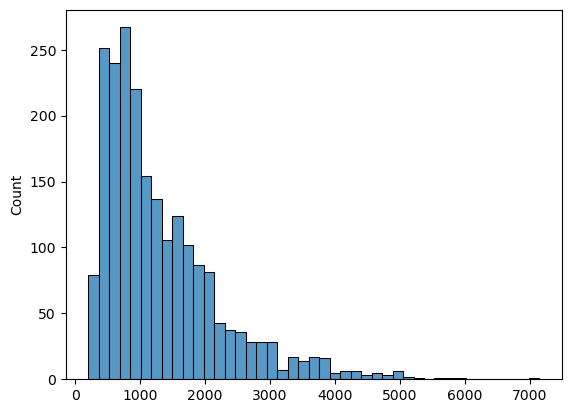

In [14]:
sns.histplot(y)

## Q1
There's one column with missing values. What is it?
  rice'

In [15]:
df.isnull().sum()

ram            0
storage        0
screen         4
final_price    0
dtype: int64

## Q2
What's the median (50% percentile) for variable 'ram'?

Prepare and split the dataset
Shuffle the dataset (the filtered one you created above), use seed` 4`2.

Split your data in train/val/test sets, wit` h 60%/20%/2 `0% distributio
n.
Use the same code as in the lectures

In [16]:
df.ram.median()

16.0

### Splitting the dataset

In [17]:
n = len(df)
n_train = int(len(df)*0.6)
n_val = int(len(df)*0.2)
n_test = int(len(df)*0.2)

In [18]:
n_train+n_val+n_test == n

True

In [19]:
idx = np.arange(n)

In [51]:
np.random.seed(42)
np.random.shuffle(idx)

df_shuffled = df.iloc[idx]

In [52]:
df_train = df_shuffled.iloc[:n_train]
df_train.reset_index(drop=True)

,ram,storage,screen,final_price
0,16,1000,16.0,1471.61
1,8,512,15.6,1349.00
2,4,256,14.0,398.01
3,8,512,17.3,729.00
4,16,1000,17.3,3899.99
...,...,...,...,...
1291,8,512,15.0,1649.00
1292,16,512,15.6,997.79
1293,8,512,14.0,979.00
1294,8,512,14.0,1474.28


In [53]:
df_train

,ram,storage,screen,final_price
779,16,1000,16.0,1471.61
1280,8,512,15.6,1349.00
960,4,256,14.0,398.01
131,8,512,17.3,729.00
701,16,1000,17.3,3899.99
...,...,...,...,...
784,8,512,15.0,1649.00
552,16,512,15.6,997.79
636,8,512,14.0,979.00
1435,8,512,14.0,1474.28


In [54]:
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_val.reset_index(inplace=True)
df_val.drop('index',axis=1,inplace=True)
df_val

C:\Users\Daniel\AppData\Local\Temp\ipykernel_20600\1297910382.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_val.drop('index',axis=1,inplace=True)


,ram,storage,screen,final_price
0,8,256,13.3,413.00
1,32,1000,16.0,2499.00
2,64,2000,17.3,3599.00
3,32,1000,15.6,999.00
4,8,512,15.6,599.00
...,...,...,...,...
427,16,1000,17.3,1999.00
428,32,1000,16.0,1999.00
429,16,1000,15.6,1230.27
430,16,1000,17.3,1334.69


In [56]:
df_test = df_shuffled.iloc[n_train+n_val:]
df_test.reset_index(drop=True)
df_test

,ram,storage,screen,final_price
1802,16,1000,14.0,854.59
1558,16,2000,15.6,1795.00
1828,16,512,14.0,999.00
528,16,512,15.6,609.01
516,32,500,15.6,1699.00
...,...,...,...,...
1246,16,512,15.6,1175.01
1885,8,512,15.6,1654.05
910,16,1000,15.6,1049.00
899,16,512,14.0,1671.00


In [57]:
y_train = df_train.final_price
y_val = df_val.final_price
y_test = df_test.final_price

In [58]:
y_train

779     1471.61
1280    1349.00
960      398.01
131      729.00
701     3899.99
         ...   
784     1649.00
552      997.79
636      979.00
1435    1474.28
167      479.00
Name: final_price, Length: 1296, dtype: float64

In [59]:
del df_train['final_price']
del df_val['final_price']
del df_test['final_price']

## Q3

---

We need to deal with missing values for the column from Q1.

We have two options: fill it with `0` or with the **mean** of this variable. Try both options. For each, train a **linear regression model without regularization** using the code from the lessons. For computing the mean, use the **training** only!

Use the **validation dataset** to evaluate the models and compare the RMSE of each option.

Round the RMSE scores to 2 decimal digits using `round(score, 2)`.

**Which option gives better RMSE?**

Options:

- With 0
- With mean
- Both are equally good
qually good

In [60]:
df_train.isna().sum()

ram        0
storage    0
screen     1
dtype: int64

In [39]:
def clean_df(df, f, n_train, n_val):
    # Create a copy of the dataframe
    df = df.copy()

    # Fill missing values
    df = df.fillna(f)

    # Create index for splitting the data
    idx = np.arange(len(df))

    # Split data into training, validation, and test sets
    df_train = df.iloc[idx[:n_train]].reset_index(drop=True)
    df_val = df.iloc[idx[n_train:n_train+n_val]].reset_index(drop=True)
    df_test = df.iloc[idx[n_train+n_val:]].reset_index(drop=True)

    # Separate target variable (final_price) from the features
    y_train = df_train.pop('final_price')
    y_val = df_val.pop('final_price')
    y_test = df_test.pop('final_price')

    # Convert features to numpy arrays
    X_train = df_train.values
    X_val = df_val.values
    X_test = df_test.values

    return X_train, X_val, X_test, y_train, y_val, y_test


In [40]:
X_train_1,X_val_1,X_test_1,y_train_1,y_val_1,y_test_1 = clean_df(df,0)

In [41]:
X_train_1

array([[0.000e+00, 8.000e+00, 5.120e+02, 1.560e+01],
       [1.000e+00, 8.000e+00, 2.560e+02, 1.560e+01],
       [2.000e+00, 8.000e+00, 2.560e+02, 1.560e+01],
       ...,
       [1.293e+03, 8.000e+00, 5.120e+02, 1.560e+01],
       [1.294e+03, 8.000e+00, 5.120e+02, 1.400e+01],
       [1.295e+03, 1.600e+01, 5.120e+02, 1.400e+01]])

In [42]:
y_train_1

0       1009.00
1        299.00
2        789.00
3       1199.00
4        669.01
         ...   
1291     689.08
1292     481.60
1293     541.55
1294     803.61
1295     709.81
Name: final_price, Length: 1296, dtype: float64

In [43]:
X_train_2,X_val_2,X_test_2,y_train_2,y_val_2,y_test_2 = clean_df(df,df.screen.mean())

In [44]:
X_train_2

array([[0.000e+00, 8.000e+00, 5.120e+02, 1.560e+01],
       [1.000e+00, 8.000e+00, 2.560e+02, 1.560e+01],
       [2.000e+00, 8.000e+00, 2.560e+02, 1.560e+01],
       ...,
       [1.293e+03, 8.000e+00, 5.120e+02, 1.560e+01],
       [1.294e+03, 8.000e+00, 5.120e+02, 1.400e+01],
       [1.295e+03, 1.600e+01, 5.120e+02, 1.400e+01]])

In [45]:
def train_linear_regression(X,y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones,X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)

    return w_full[0],w_full[1:]

In [46]:
def rmse(y,y_pred):
    se = (y-y_pred)**2
    mse = se.mean()
    return np.sqrt(mse)

In [47]:
w0,w = train_linear_regression(X_train_1,y_train_1)

y_pred = w0+X_val_1.dot(w)

np.round(rmse(y_val_1,y_pred))

717.0

<Axes: xlabel='final_price', ylabel='Count'>

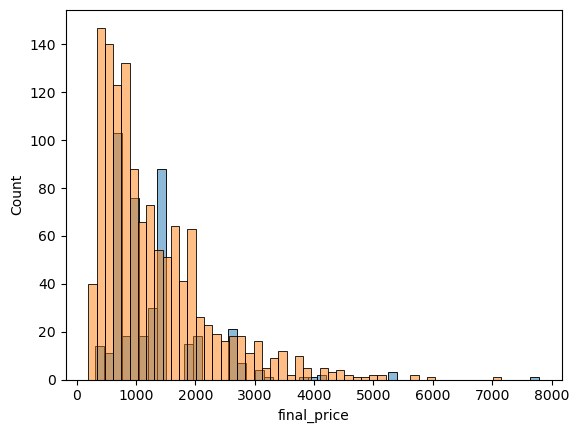

In [48]:
sns.histplot(y_pred,bins=50,alpha=0.5) # Predicted price
sns.histplot(y_train_1,bins=50,alpha=0.5) # Actual price

In [49]:
w0,w = train_linear_regression(X_train_2,y_train_2)

y_pred = w0+X_val_2.dot(w)  

np.round(rmse(y_val_2,y_pred))

719.0

## Q4 
___
Now let's train a **regularized linear regression**.

For this question, fill the NAs with `0`.

Try different values of `r` from this list: `[0, 0.01, 0.1, 1, 5, 10, 100]`.

Use **RMSE** to evaluate the model on the **validation dataset**.

Round the RMSE scores to 2 decimal digits.

**Which r gives the best RMSE?**

If there are multiple options, select the smallest `r`.

Options:

- `0`
- `0.01`
- `1`
- `10`
- `100`


In [778]:
def train_linear_regression_regularized(X,y,r=0.01):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones,X])

    XTX = X.T.dot(X)
    XTX = XTX + r*np.eye(XTX.shape[0])
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)

    return w_full[0],w_full[1:]

In [779]:
for r in [0, 0.01, 0.1, 1, 5, 10, 100]:
    
    w0,w = train_linear_regression_regularized(X_train_1,y_train_1,r)
    
    y_pred = w0+X_val_1.dot(w)
    
    score = rmse(y_val_1,y_pred)
    print(r,w0,np.round(score,2))

0 443.0044373302046 734.72
0.01 442.45330287923446 734.73
0.1 437.55406134839836 734.77
1 393.92952561276115 735.22
5 272.92305049392803 736.66
10 197.14438353013816 737.7
100 32.562421888521186 740.31


# Q5

We used seed `42` for splitting the data. Let's find out how selecting the seed influences our score.

Try different seed values: `[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]`.

For each seed, do the **train/validation/test split** with a 60%/20%/20% distribution.

Fill the missing values with `0` and train a model **without regularization**.

For each seed, evaluate the model on the **validation dataset** and collect the RMSE scores.

What's the **standard deviation** of all the scores? To compute the standard deviation, use `np.std`.

Round the result to 3 decimal digits (`round(std, 3)`).

**What's the value of std?**

- `19.176`
- `29.176`
- `39.176`
- `49.176`



In [781]:
rmse_values = []
for i in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:

    df_copy = df.copy()
    df_copy = df_copy.fillna(0)
    
    idx = np.arange(len(df_copy))
    
    np.random.seed(i)
    np.random.shuffle(idx)

    df_train = df_copy.iloc[idx[:n_train]]
    df_val = df_copy.iloc[idx[n_train:n_train+n_val]]
    df_test = df_copy.iloc[idx[n_train+n_val:]]


    y_train = df_train.final_price
    y_val = df_val.final_price
    y_test = df_test.final_price

    del df_train['final_price']
    del df_val['final_price']
    del df_test['final_price']
    
    X_train = df_train.values
    X_val = df_val.values
    X_test = df_test.values
    

    w0,w = train_linear_regression(X_train,y_train)

    y_pred = w0+X_val.dot(w)

    rmse_values.append(np.round(rmse(y_val,y_pred)))
    print(f'seed: {i}, rmse: {np.round(rmse(y_val,y_pred))}')

seed: 0, rmse: 565.0
seed: 1, rmse: 637.0
seed: 2, rmse: 589.0
seed: 3, rmse: 598.0
seed: 4, rmse: 572.0
seed: 5, rmse: 573.0
seed: 6, rmse: 647.0
seed: 7, rmse: 550.0
seed: 8, rmse: 587.0
seed: 9, rmse: 576.0


In [782]:
np.std(rmse_values)

29.261578904768623

## Q6

Split the dataset like previously, use seed `9`.

Combine the **train** and **validation** datasets.

Fill the missing values with `0` and train a model with `r = 0.001`.

**What's the RMSE on the test dataset?**

Options:

- `598.60`
- `608.60`
- `618.60`
- `628.60`



In [784]:
df_copy = df.copy()
df_copy = df_copy.fillna(0)

idx = np.arange(len(df_copy))
    
np.random.seed(9)
np.random.shuffle(idx)

df_val_train = df_copy.iloc[idx[:n_train+n_val]]
df_test = df_copy.iloc[idx[n_train+n_val:]]

y_train_val = df_val_train.final_price
y_test = df_test.final_price

del df_test['final_price']
del df_val_train['final_price']

X_val_train = df_val_train.values
X_test = df_test.values


w0,w = train_linear_regression_regularized(X_val_train,y_train_val,0.001)

y_pred = w0+X_test.dot(w)

rmse_values.append(np.round(rmse(y_test,y_pred)))
print(f'seed: {i}, rmse: {np.round(rmse(y_test,y_pred))}')

seed: 9, rmse: 609.0
